<a href="https://colab.research.google.com/github/JuanDev07/Techa-IA/blob/main/Proyec_Tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, auc, roc_curve, classification_report, accuracy_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import pickle

## **1. Análisis de datos**

### **Cargar los datos**

In [ ]:
data = pd.read_excel('BD_DIB_Outdoor_Solar_Panels_Electrical_Parameters.xlsx')
data

Panel       C            datetime  Irradiance  Tpanel  Tamb        Voc  \
0       CIGS  0.0148 2021-03-08 16:16:00         169      27    25  35.720841   
1       CIGS  0.0148 2021-03-08 16:43:00          88      26    25  33.959140   
2       CIGS  0.0148 2021-03-08 16:50:00          78      26    25  33.623958   
3       CIGS  0.0148 2021-03-08 16:58:00          61      25    24  32.919676   
4       CIGS  0.0148 2021-03-08 17:00:00          63      25    24  33.095248   
...      ...     ...                 ...         ...     ...   ...        ...   
301967   HIT  0.0032 2021-12-29 16:26:00         105      24    21  64.510372   
301968   HIT  0.0032 2021-12-29 16:27:00          98      24    21  64.328974   
301969   HIT  0.0032 2021-12-29 16:35:00          68      23    21  63.354691   
301970   HIT  0.0032 2021-12-29 16:36:00          63      23    21  63.146962   
301971   HIT  0.0032 2021-12-29 16:38:00          55      22    21  62.784166   

             Isc       Pmax       Vmpp      Impp      Vmin      Imin  \
0       0.629281  10.191270  16.945122  0.601428  0.303260  0.627268   
1       0.341521   2.861832   8.812083  0.324762  0.163601  0.326765   
2       0.294755   2.354129   8.307709  0.283367  0.145645  0.286671   
3       0.264388   1.383342   6.033598  0.229273  0.111727  0.224124   
4       0.249782   1.582876   6.648386  0.238084  0.113723  0.239360   
...          ...        ...        ...       ...       ...       ...   
301967  0.814442  33.407680  54.962258  0.607829  2.428392  0.398122   
301968  0.736636  31.243917  56.205339  0.555889  2.273326  0.479343   
301969  0.397954  16.213972  41.272192  0.392855  1.541882  0.336620   
301970  0.366516  16.306981  45.027522  0.362156  1.433629  0.325822   
301971  0.414235  14.982616  45.272136  0.330946  1.278563  0.284507   

        Voc_Success  Isc_Success  
0          0.319979    99.151028  
1          4.320785    99.518242  
2          2.742526    99.566843  
3         15.229036    99.660606  
4          4.172241    99.656378  
...             ...          ...  
301967    51.117185    96.235657  
301968    34.928102    96.466094  
301969    15.412511    97.566270  
301970    11.103014    97.729695  
301971    31.317482    97.963558  

[301972 rows x 15 columns]

In [ ]:
data.describe()

C                       datetime     Irradiance  \
count  301972.000000                         301972  301972.000000   
mean        0.006581  2021-08-23 05:32:36.366948352     483.347774   
min         0.001000            2021-03-08 07:04:00      51.000000   
25%         0.004400            2021-06-01 08:54:45     244.000000   
50%         0.006800            2021-09-06 16:11:00     430.000000   
75%         0.008200            2021-11-07 15:27:00     720.000000   
max         0.014800            2021-12-29 16:39:00    1281.000000   
std         0.003493                            NaN     284.368659   

              Tpanel           Tamb            Voc            Isc  \
count  301972.000000  301972.000000  301972.000000  301972.000000   
mean       42.798120      29.554359      42.426477       2.303623   
min        14.000000      17.000000       2.717435       0.103352   
25%        34.000000      26.000000      20.289913       1.081890   
50%        43.000000      30.000000      36.556801       1.971819   
75%        52.000000      33.000000      64.097838       3.263285   
max        74.000000      44.000000      69.492964      13.181660   
std        11.834454       4.519985      18.243901       1.512674   

                Pmax           Vmpp           Impp           Vmin  \
count  301972.000000  301972.000000  301972.000000  301972.000000   
mean       78.080897      34.235663       2.018383       3.246962   
min         0.345071       2.255153       0.091144       0.000000   
25%        23.623951      16.548817       0.933115       0.482822   
50%        51.192152      29.585628       1.726363       1.106142   
75%       101.053733      52.922552       2.832388       4.341847   
max       404.420215      89.763022       7.653916      22.458235   
std        74.832058      15.599988       1.354176       4.300981   

                Imin    Voc_Success    Isc_Success  
count  301972.000000  301972.000000  301972.000000  
mean        0.130783      86.647185      93.824087  
min         0.000000       0.004022      65.416381  
25%         0.000000      96.814378      91.792356  
50%         0.000000     100.000000      96.613433  
75%         0.046709     100.000000      98.420314  
max         2.261033     100.000000     100.000000  
std         0.321823      27.902479       6.624964

### **Exploración de Datos del Dataframe (identificación de tipos de datos)**

In [ ]:
Grupo_Panel = data.groupby('Panel')

In [ ]:
Grupo_Panel.describe()

C                                                              \
          count      mean     min     25%     50%     75%     max       std   
Panel                                                                         
CIGS   112891.0  0.007068  0.0033  0.0044  0.0082  0.0082  0.0148  0.003119   
HIT    112418.0  0.006782  0.0032  0.0047  0.0068  0.0068  0.0136  0.003126   
m-Si    76663.0  0.005570  0.0010  0.0010  0.0044  0.0082  0.0148  0.004238   

      datetime                                 ... Voc_Success             \
         count                           mean  ...         max        std   
Panel                                          ...                          
CIGS    112891  2021-08-26 16:46:47.426101248  ...       100.0  25.795689   
HIT     112418  2021-08-14 23:48:52.107847168  ...       100.0  32.822777   
m-Si     76663  2021-08-30 04:55:14.991586560  ...       100.0  20.371421   

      Isc_Success                                                         \
            count       mean        min        25%        50%        75%   
Panel                                                                      
CIGS     112891.0  97.815870  91.729364  97.091741  98.169375  98.905763   
HIT      112418.0  88.611336  65.416381  83.942432  90.316494  94.507148   
m-Si      76663.0  95.589875  72.442211  95.008461  97.349946  98.694612   

                             
              max       std  
Panel                        
CIGS    99.890264  1.425829  
HIT     99.477867  7.321817  
m-Si   100.000000  4.984779  

[3 rows x 112 columns]

### **Generación de Estadísticas Descriptivas ( Panel: HIT)**

In [ ]:
Panel_HIT = data.groupby('Panel').get_group('HIT')
Panel_HIT.describe()

C                       datetime     Irradiance  \
count  112418.000000                         112418  112418.000000   
mean        0.006782  2021-08-14 23:48:52.107847168     494.701827   
min         0.003200            2021-03-08 07:04:00      51.000000   
25%         0.004700            2021-05-30 08:41:15     264.000000   
50%         0.006800            2021-08-23 08:24:30     447.000000   
75%         0.006800            2021-10-28 07:33:45     723.750000   
max         0.013600            2021-12-29 16:38:00    1281.000000   
std         0.003126                            NaN     276.208158   

              Tpanel           Tamb            Voc            Isc  \
count  112418.000000  112418.000000  112418.000000  112418.000000   
mean       43.508886      29.815786      64.496696       3.018327   
min        15.000000      18.000000      57.760613       0.209933   
25%        35.000000      27.000000      63.831592       1.571114   
50%        44.000000      30.000000      64.580590       2.711858   
75%        53.000000      33.000000      65.224261       4.410756   
max        74.000000      44.000000      69.492964      13.181660   
std        11.431580       4.420166       1.112178       1.725659   

                Pmax           Vmpp           Impp           Vmin  \
count  112418.000000  112418.000000  112418.000000  112418.000000   
mean      144.991260      52.388342       2.726051       7.340922   
min         1.948633       7.570762       0.166005       0.330612   
25%        77.489921      52.410512       1.433487       3.551889   
50%       133.066098      53.887003       2.440210       6.267006   
75%       211.868388      55.009323       3.977657      10.368940   
max       404.420215      89.763022       7.653916      22.458235   
std        81.747583       6.958418       1.555192       4.699232   

                Imin    Voc_Success    Isc_Success  
count  112418.000000  112418.000000  112418.000000  
mean        0.238982      81.186641      88.611336  
min         0.000000       0.004022      65.416381  
25%         0.000000      80.778304      83.942432  
50%         0.000000     100.000000      90.316494  
75%         0.269014     100.000000      94.507148  
max         2.261033     100.000000      99.477867  
std         0.461448      32.822777       7.321817

### **Visualización de datos utilizando gráficos de barras, histogramas y gráficos de dispersión**

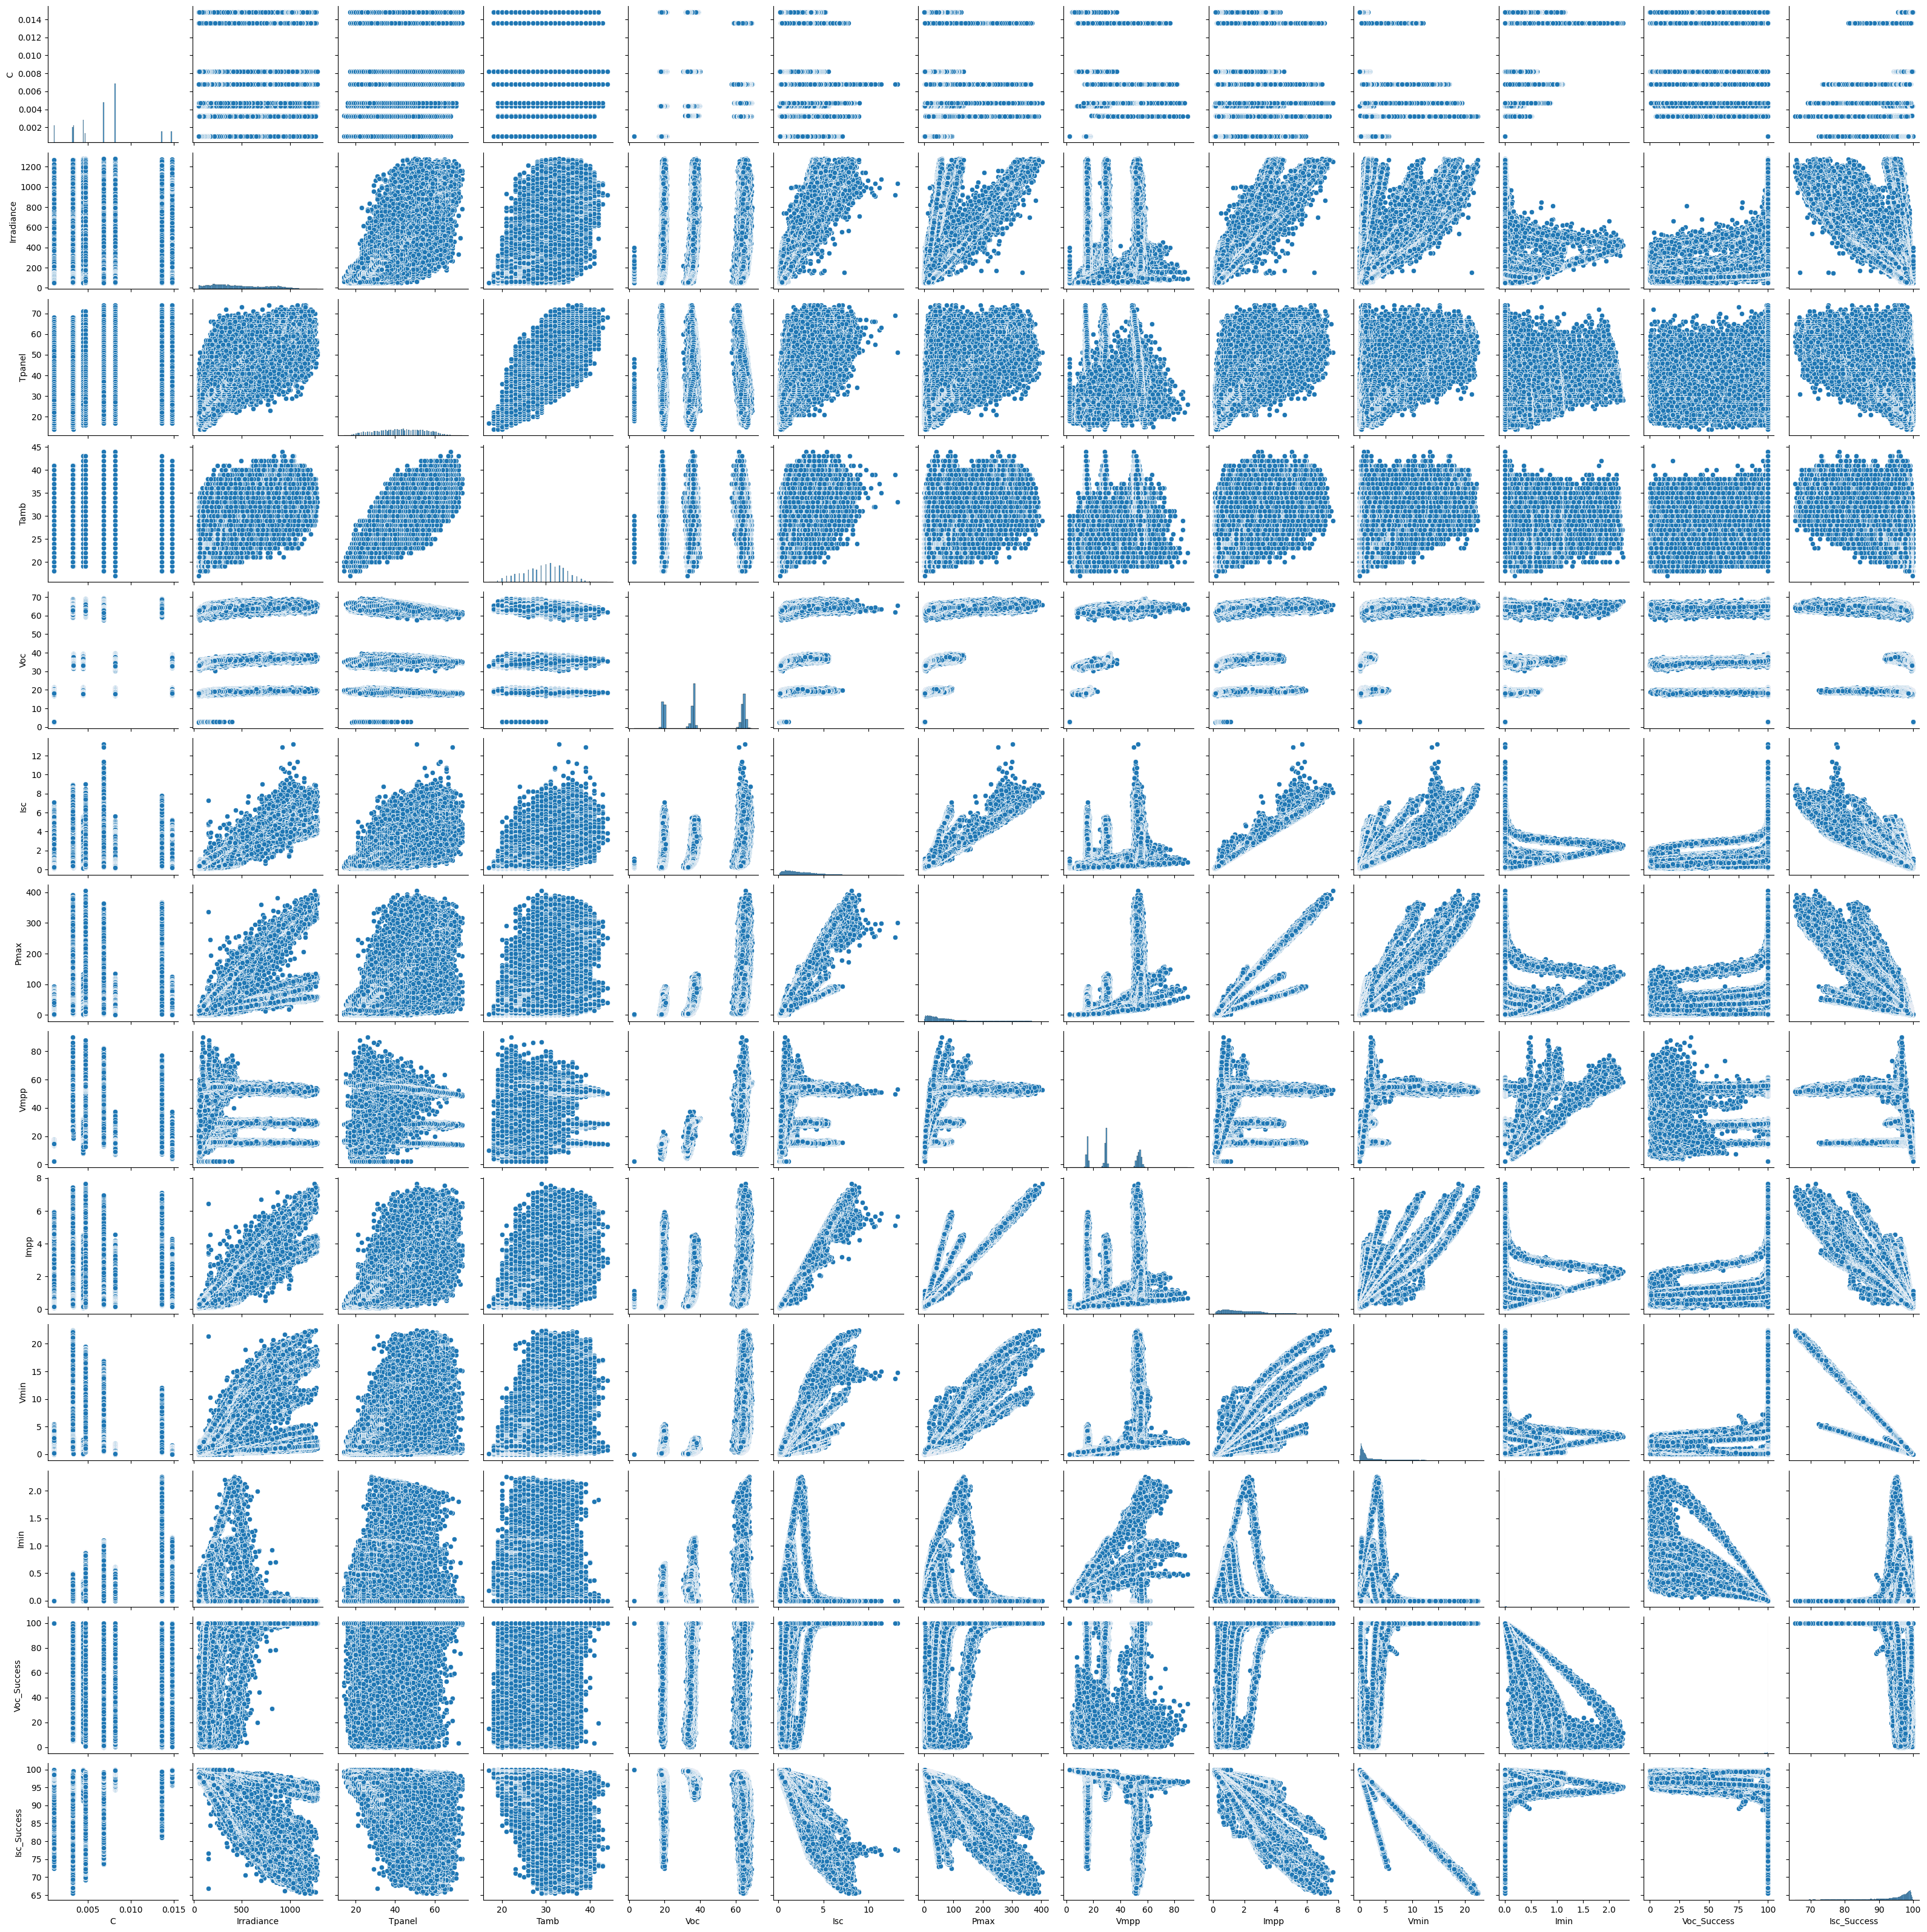

In [ ]:
sns.pairplot(data)

In [ ]:
# Filtrar datos por tipo de panel
cigs_data = data[data['Panel'] == 'CIGS']
hit_data = data[data['Panel'] == 'HIT']
msi_data = data[data['Panel'] == 'm-Si']

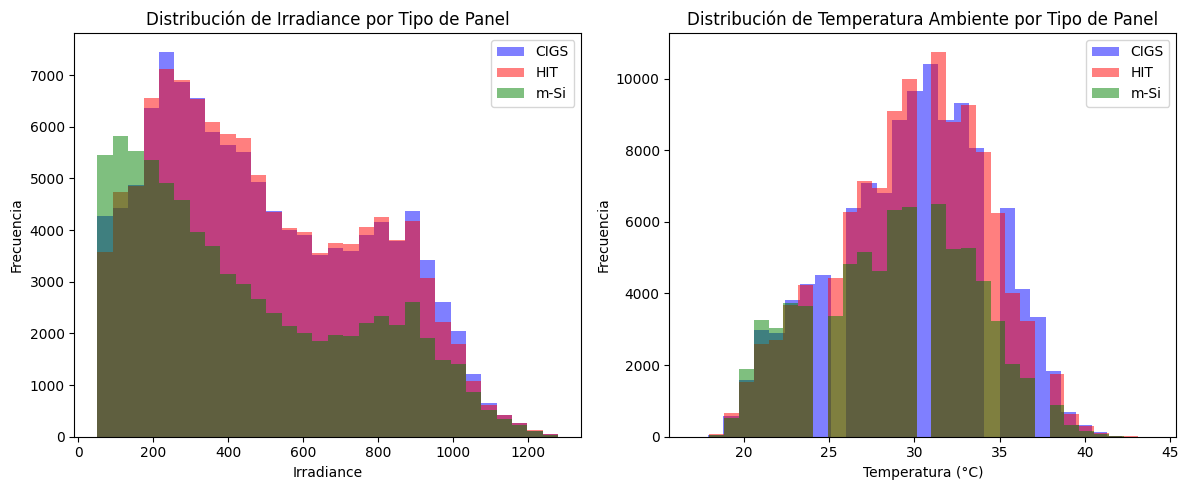

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(cigs_data['Irradiance'], bins=30, color='blue', alpha=0.5, label='CIGS')
plt.hist(hit_data['Irradiance'], bins=30, color='red', alpha=0.5, label='HIT')
plt.hist(msi_data['Irradiance'], bins=30, color='green', alpha=0.5, label='m-Si')
plt.title('Distribución de Irradiance por Tipo de Panel')
plt.xlabel('Irradiance')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(cigs_data['Tamb'], bins=30, color='blue', alpha=0.5, label='CIGS')
plt.hist(hit_data['Tamb'], bins=30, color='red', alpha=0.5, label='HIT')
plt.hist(msi_data['Tamb'], bins=30, color='green', alpha=0.5, label='m-Si')
plt.title('Distribución de Temperatura Ambiente por Tipo de Panel')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Filtrar datos en el rango deseado
rango_irradiance = data[(data['Irradiance'] >= 200) & (data['Irradiance'] <= 1000)]
rango_tamb = rango_irradiance[(rango_irradiance['Tamb'] >= 20) & (rango_irradiance['Tamb'] <= 40)]

print("Datos en el rango deseado:")
print(rango_tamb.describe())

Datos en el rango deseado:
                   C                       datetime     Irradiance  \
count  236110.000000                         236110  236110.000000   
mean        0.006868  2021-08-16 06:05:41.392148224     535.579230   
min         0.001000            2021-03-08 08:03:00     200.000000   
25%         0.004400            2021-05-28 13:23:00     328.000000   
50%         0.006800            2021-08-24 14:44:00     495.000000   
75%         0.008200            2021-11-01 09:06:00     741.000000   
max         0.014800            2021-12-29 13:38:00    1000.000000   
std         0.003469                            NaN     232.691372   

              Tpanel           Tamb            Voc            Isc  \
count  236110.000000  236110.000000  236110.000000  236110.000000   
mean       45.528360      30.438440      43.473968       2.556820   
min        17.000000      20.000000       2.797301       0.166443   
25%        38.000000      28.000000      35.457484       1.489385 

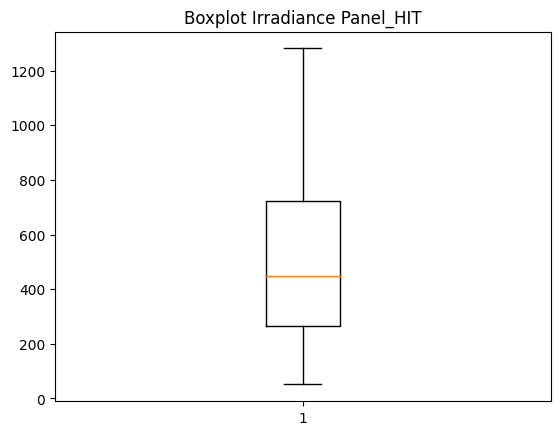

In [ ]:
plt.boxplot(Panel_HIT['Irradiance'])
plt.title('Boxplot Irradiance Panel_HIT')
plt.show()

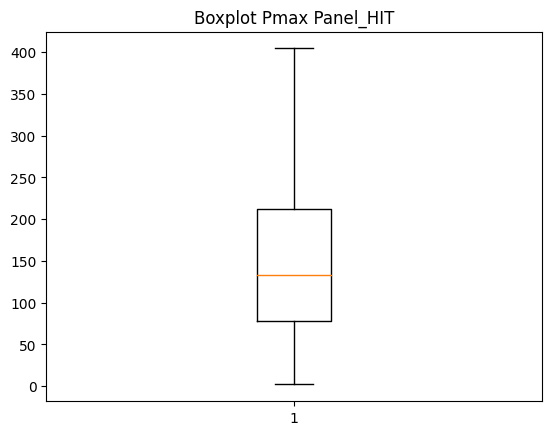

In [ ]:
plt.boxplot(Panel_HIT['Pmax'])
plt.title('Boxplot Pmax Panel_HIT')
plt.show()

In [ ]:
# Codificar la variable categórica 'Panel'
le = LabelEncoder()
data['Panel'] = le.fit_transform(data['Panel'])

In [ ]:
# Separación de variables independientes (X) y dependiente (y)
X = data[['Irradiance', 'Tamb', 'Panel']]
y = data['Pmax']

In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_escalado= scaler.fit_transform(X)

In [ ]:
#  entrenamiento y prueba (80% - 20%)
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X_escalado, y, test_size=0.2, random_state=42)

In [ ]:
#Entrenar el modelo RandomForestRegressor
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_entrenamiento, y_entrenamiento)

# Predicciones del modelo
y_predicciones = modelo.predict(X_prueba)

# Calcular la precisión (MSE y R^2)
mse = mean_squared_error(y_prueba, y_predicciones)
mae = mean_absolute_error(y_prueba, y_predicciones)
r2_score = modelo.score(X_prueba, y_prueba)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2_score}")

MSE: 58.390507738909996
MAE: 4.6340637850728745
R2: 0.9895592489387028


In [ ]:
# Crear curva ROC (reducimos el problema a clasificación binaria usando un umbral arbitrario)
fpr, tpr, thresholds = roc_curve(y_prueba >= y_prueba.median(), y_predicciones >= y_prueba.median())
roc_auc = auc(fpr, tpr)


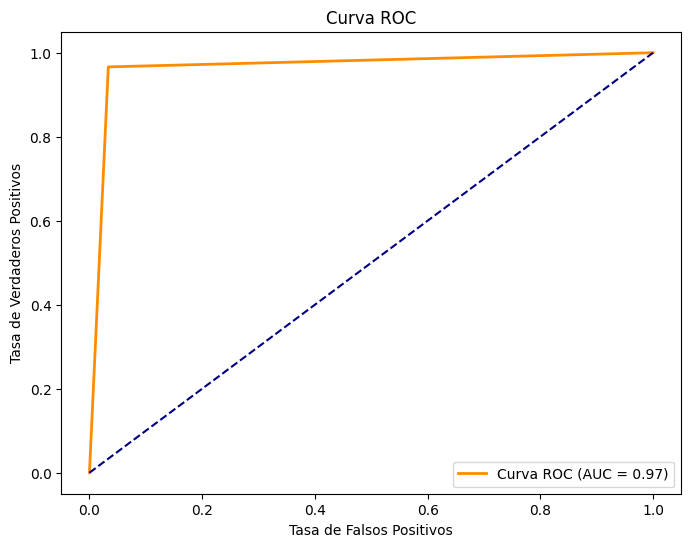

In [ ]:
# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Validación cruzada (K-Fold)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(modelo, X_escalado, y, cv=kfold, scoring='r2')
print(f"Puntajes de Validación Cruzada (R^2): {cv_scores}")
print(f"R^2 Promedio en Validación Cruzada: {np.mean(cv_scores)}")

Puntajes de Validación Cruzada (R^2): [0.98956192 0.98939722 0.98959115 0.98926336 0.98898255]
R^2 Promedio en Validación Cruzada: 0.9893592406985606


In [ ]:
# Análisis de sobreajuste y subajuste
train_score = modelo.score(X_entrenamiento, y_entrenamiento)
test_score = modelo.score(X_prueba, y_prueba)
print(f"R2 en Entrenamiento: {train_score}")
print(f"R2 en Prueba: {test_score}")

if train_score > test_score + 0.1:
    print("Posible sobreajuste detectado.")
elif train_score < test_score - 0.1:
    print("Posible subajuste detectado.")
else:
    print("El modelo tiene un buen balance entre entrenamiento y prueba.")

R2 en Entrenamiento: 0.992066823717405
R2 en Prueba: 0.9895592489387028
El modelo tiene un buen balance entre entrenamiento y prueba.


In [ ]:
with open('modelo.pkl', 'wb') as f:
    pickle.dump(modelo, f)

In [ ]:
with open('escalador.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
from google.colab import files

files.download('modelo.pkl')
files.download('escalador.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>